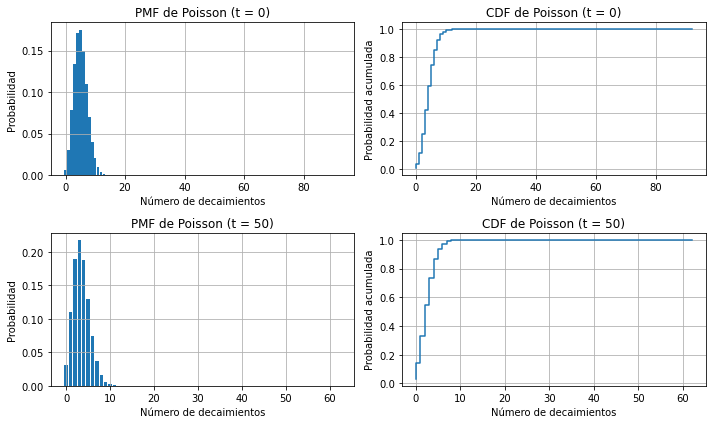

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def simul3(N, time):
    numero_nucleos = N
    numero_decaimientos = []
    tiempos = []
    ti = 0
    x_nucleos = []
    poissonPDF = []
    poissonCDF = []

    while numero_nucleos > 0:
        dec = poisson.rvs(pdf[0] * numero_nucleos, size=1)[0]
        tiempos.append(ti)
        numero_decaimientos.append(dec)
        numero_nucleos -= dec

        if time >= ti and time < (ti + 5):  # Calcular PDF y CDF de Poisson para el tiempo deseado
            x_nucleos = range(0, numero_nucleos + 1)
            poissonCDF = poisson.cdf(x_nucleos, pdf[0] * numero_nucleos)
            poissonPDF = poisson.pmf(x_nucleos, pdf[0] * numero_nucleos)

        ti += 5

    return tiempos, numero_decaimientos, x_nucleos, poissonPDF, poissonCDF

time_values = [0, 50] 
fig, axes = plt.subplots(len(time_values), 2, figsize=(10, 6))

for i, time in enumerate(time_values):
    s = simul3(100, time)

    # Graficar la PMF de Poisson
    axes[i,0].bar(s[2], s[3])
    axes[i,0].set_xlabel("Número de decaimientos")
    axes[i,0].set_ylabel("Probabilidad")
    axes[i,0].grid()
    axes[i,0].set_title(f"PMF de Poisson (t = {time})")

    # Graficar la CDF de Poisson
    axes[i,1].step(s[2], s[4])
    axes[i,1].set_xlabel("Número de decaimientos")
    axes[i,1].set_ylabel("Probabilidad acumulada")
    axes[i,1].grid()
    axes[i,1].set_title(f"CDF de Poisson (t = {time})")

plt.tight_layout()
plt.show()
